# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [21]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from newsapi import NewsApiClient
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emilioacubero/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [23]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [24]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='Bitcoin', language='en')

In [25]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q='Ethereum', language='en')

In [80]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]

bitcoin_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
1,2022-02-13,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825
2,2022-02-14,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837
3,2022-02-15,The confiscation of the Bitcoin that remained ...,0.6486,0.146,0.000,0.854
4,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831


In [82]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sentiment_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_sentiment_df = ethereum_sentiment_df[cols]

ethereum_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,2022-02-16,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964
3,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
4,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917


In [83]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.064760,0.069600,0.049900,0.880500
std,0.476352,0.051707,0.065011,0.066818
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.277550,0.044000,0.000000,0.835500
50%,0.038600,0.066000,0.000000,0.870500
75%,0.455475,0.094250,0.097750,0.935750
max,0.778300,0.163000,0.187000,1.000000


In [84]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.155640,0.076150,0.032200,0.891600
std,0.414052,0.083462,0.040875,0.090565
min,-0.526700,0.000000,0.000000,0.692000
25%,-0.110175,0.000000,0.000000,0.841000
50%,0.000000,0.057500,0.000000,0.904500
75%,0.528675,0.130250,0.059000,0.958000
max,0.834000,0.249000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score with 0.076.
 
Q: Which coin had the highest compound score?

A: Ethereum has the highest compund score with 0.834.

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score with 0.249.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [30]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [35]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char','also', 'reutersdado'}

In [36]:
# Complete the tokenizer function

def tokenizer(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output
    
    
    return tokens

In [85]:
# Create a new tokens column for Bitcoin
btc_word_tokenized = []
for text in bitcoin_sentiment_df.text:  
    words = []
    words = words + tokenizer(text)
    btc_word_tokenized.append(words)

bitcoin_sentiment_df["tokens"]=btc_word_tokenized
bitcoin_sentiment_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853,"[even, cyberspace, department, justice, able, ..."
1,2022-02-13,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825,"[couple, would, never, flee, country, risk, lo..."
2,2022-02-14,"If Sundays Super Bowl ads are any indication, ...",0.7783,0.163,0.000,0.837,"[sundays, super, bowl, ad, indication, crypto,..."
3,2022-02-15,The confiscation of the Bitcoin that remained ...,0.6486,0.146,0.000,0.854,"[confiscation, bitcoin, remained, mr, lichtens..."
4,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831,"[bitcoin, wa, seen, many, libertarianleaning, ..."


In [86]:
# Create a new tokens column for Ethereum
eth_word_tokenized = []
for text in ethereum_sentiment_df.text:
    words = []
    words = words + tokenizer(text)
    eth_word_tokenized.append(words)
    
ethereum_sentiment_df["tokens"]=eth_word_tokenized
ethereum_sentiment_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848,"[february, shit, hit, fan, usual, way, old, tw..."
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[technical, analysis, isnt, perfect, tool, may..."
2,2022-02-16,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964,"[people, colorado, able, pay, state, tax, cryp..."
3,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, e..."
4,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, million,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [ ]:
from collections import Counter
from nltk import ngrams

In [89]:
# Generate the Bitcoin N-grams where N=2
btc_word_tokenized_list = [item for elem in btc_word_tokenized for item in elem]
btc_n_gram_counts = Counter(ngrams(btc_flat_word_tokenized_list, n=2))
print(dict(btc_n_gram_counts))

{('even', 'cyberspace'): 1, ('cyberspace', 'department'): 1, ('department', 'justice'): 1, ('justice', 'able'): 1, ('able', 'use'): 1, ('use', 'tried'): 1, ('tried', 'true'): 1, ('true', 'investigative'): 1, ('investigative', 'technique'): 1, ('technique', 'following'): 1, ('following', 'money'): 1, ('money', 'ms'): 1, ('ms', 'monaco'): 1, ('monaco', 'led'): 1, ('led', 'u'): 1, ('u', 'al'): 1, ('al', 'capone'): 1, ('capone', 'helped'): 1, ('helped', 'u'): 1, ('u', 'dest'): 1, ('dest', 'couple'): 1, ('couple', 'would'): 1, ('would', 'never'): 1, ('never', 'flee'): 1, ('flee', 'country'): 1, ('country', 'risk'): 1, ('risk', 'losing'): 1, ('losing', 'access'): 1, ('access', 'ability'): 1, ('ability', 'child'): 1, ('child', 'lawyer'): 1, ('lawyer', 'wroteat'): 1, ('wroteat', 'hearing'): 1, ('hearing', 'prosecutor'): 1, ('prosecutor', 'margaret'): 1, ('margaret', 'lynaugh'): 1, ('lynaugh', 'opposing'): 1, ('opposing', 'bail'): 1, ('bail', 'f'): 1, ('f', 'sundays'): 1, ('sundays', 'super'): 

In [90]:
# Generate the Ethereum N-grams where N=2
eth_word_tokenized_list = [item for elem in eth_word_tokenized for item in elem]
eth_n_gram_counts = Counter(ngrams(eth_flat_word_tokenized_list, n=2))
print(dict(eth_n_gram_counts))

{('february', 'shit'): 1, ('shit', 'hit'): 1, ('hit', 'fan'): 1, ('fan', 'usual'): 1, ('usual', 'way'): 1, ('way', 'old'): 1, ('old', 'tweet'): 1, ('tweet', 'resurfaced'): 1, ('resurfaced', 'brantly'): 1, ('brantly', 'millegan'): 1, ('millegan', 'director'): 1, ('director', 'operation'): 1, ('operation', 'ethereum'): 1, ('ethereum', 'name'): 1, ('name', 'service'): 1, ('service', 'ens'): 1, ('ens', 'web'): 1, ('web', 'business'): 1, ('business', 'written'): 1, ('written', 'following'): 1, ('following', 'may'): 1, ('may', 'technical'): 1, ('technical', 'analysis'): 1, ('analysis', 'isnt'): 1, ('isnt', 'perfect'): 1, ('perfect', 'tool'): 1, ('tool', 'may'): 1, ('may', 'point'): 1, ('point', 'way'): 1, ('way', 'ethereumethereumethusd'): 1, ('ethereumethereumethusd', 'continues'): 1, ('continues', 'volatile'): 1, ('volatile', 'crypto'): 1, ('crypto', 'investment'): 1, ('investment', 'crypto'): 1, ('crypto', 'volatile'): 1, ('volatile', 'nature'): 1, ('nature', 'im'): 1, ('im', 'setting'): 

In [52]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    return Counter(tokens).most_common(10)

In [91]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_word_tokenized_list)

[('bitcoin', 11),
 ('reuters', 6),
 ('feb', 5),
 ('country', 4),
 ('russia', 4),
 ('u', 3),
 ('would', 3),
 ('market', 3),
 ('justice', 2),
 ('money', 2)]

In [92]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_word_tokenized_list)

[('past', 6),
 ('crypto', 5),
 ('ethereum', 4),
 ('may', 4),
 ('cryptocurrency', 4),
 ('year', 4),
 ('volume', 4),
 ('newsletter', 4),
 ('hit', 3),
 ('share', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

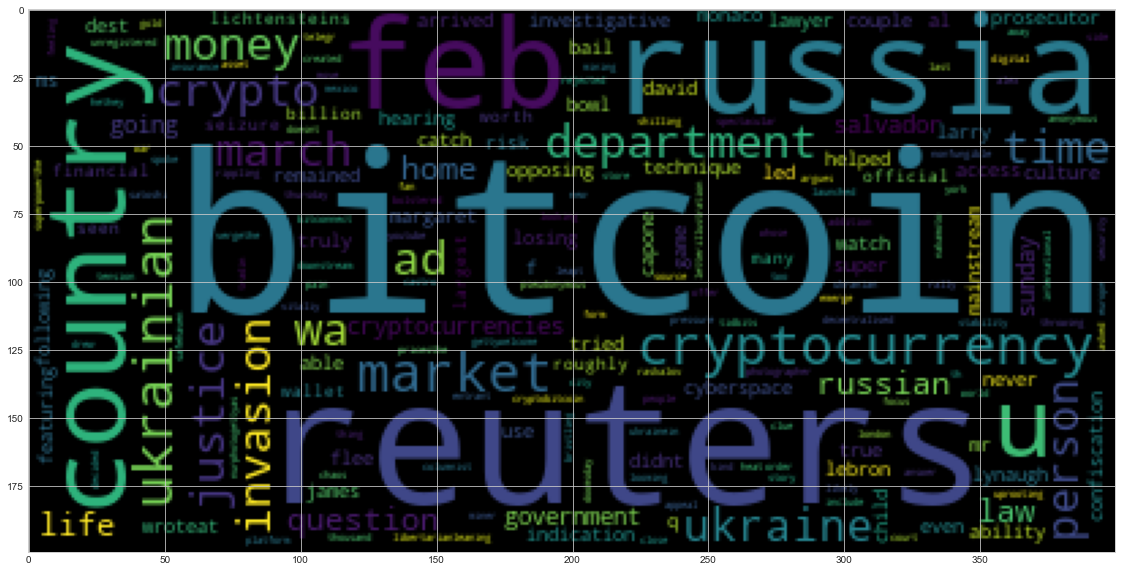

In [94]:
# Generate the Bitcoin word cloud
btc_string = ' '.join([str(elem) for elem in btc_word_tokenized_list ])
btc_wc = WordCloud().generate(btc_string)
plt.imshow(btc_wc)

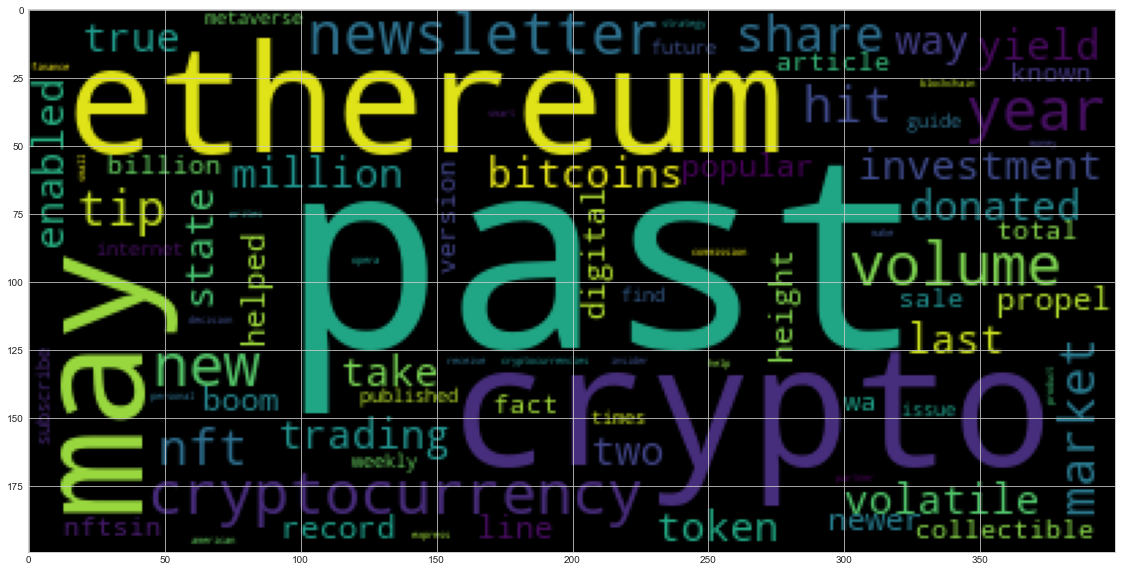

In [95]:
# Generate the Ethereum word cloud
eth_string = ' '.join([str(elem) for elem in eth_word_tokenized_list ])
eth_wc = WordCloud().generate(eth_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [67]:
import spacy
from spacy import displacy

In [68]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [69]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [96]:
# Concatenate all of the Bitcoin text together
btc_text = []
for text in bitcoin_sentiment_df.text:
    btc_text.append(text)
btc_text_string = ' '.join([str(elem) for elem in btc_text])
print(btc_text_string)

Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars] The couple would never flee from the country at the risk of losing access to their ability to have children, the lawyer wrote.
At the hearing, a prosecutor, Margaret Lynaugh, said in opposing bail f… [+1600 chars] If Sundays Super Bowl ads are any indication, crypto has truly arrived in mainstream culture. And if you didnt catch the game, you can watch the ads here, featuring Larry David, LeBron James, and a Q… [+3454 chars] The confiscation of the Bitcoin that remained in Mr. Lichtensteins wallet on Feb. 1, worth roughly $3.6 billion at the time, was the Justice Departments largest financial seizure ever, officials have… [+1442 chars] "Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance," argues a columnist in the New York Times, "a form

In [97]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text_string)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [98]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [99]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(btc_entities)

['the Department of Justice', '+3454', 'the New York Times', 'Reuters', 'Reuters', 'Russia', 'Ukraine', 'Getty\r\nWelcome to', 'Russia', 'Ukraine', 'YouTube', 'Verge', 'BitConnect', 'Nurphoto/Getty', 'Russia', 'Mexico City', 'Telegr', 'Reuters', 'Russia', 'LONDON', 'Reuters', 'Russia', 'Ukraine', 'Russia', 'Reuters', 'Ukraine', 'documents</li></ul', 'SAN SALVADOR', 'Reuters', 'El Salvador', 'Congress', 'Robinson Crusoe', 'Welch']


---

### Ethereum NER

In [100]:
# Concatenate all of the Ethereum text together
# Compile the list of lists of texts for each Bitcoin article
eth_text = []
for text in ethereum_sentiment_df.text:
    eth_text.append(text) 
eth_text_string = ' '.join([str(elem) for elem in eth_text])
print(eth_text_string)

In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars] Technical analysis isnt a perfect tool, but it may point the way for Ethereum
Ethereum (ETH-USD
) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars] People in Colorado will be able to pay their state taxes in cryptocurrency by the middle of this year, the US state's governor has revealed.
Gov. Jared Polis laid out the timing of the move, a longt… [+2206 chars] Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin's share dropped dramatically. 
Between 2020 and 2021, ethereum trading volume in… [+1187 chars] Illustration by James Bareham / The Verge

 


 More than $15 million has been donated so far More than $15 million in cryptocurrency has been d

In [101]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text_string)


# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [102]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [103]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(eth_entities)

['Ethereum Name Service', 'ENS', 'Ethereum', 'ETH-USD', 'Colorado', 'US', 'Ukrainian', 'Russia', 'Facebook', 'Microsoft', 'Ethereum', 'NFT', 'YouTube', 'Waka Flacka Fla', 'NFT', 'TIME', 'TIME', 'NFT', 'Ethereum', 'American Express', 'Russia', 'Ukraine', 'Opera', 'Opera', 'American Express']


---